In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def display_graph(g):
    elarge = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] > 5]
    esmall = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] <= 5]

    pos = nx.spring_layout(g)  # positions for all nodes

    plt.figure(figsize=(10,10))


    # nodes
    nx.draw_networkx_nodes(g, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(g, pos, edgelist=elarge,
                           width=6)
    nx.draw_networkx_edges(g, pos, edgelist=esmall,
                           width=2, alpha=0.5, edge_color='b')

    # labels
    nx.draw_networkx_labels(g, pos, font_size=10, font_family='sans-serif')

    plt.axis('off')
    plt.show()

    return None

In [4]:
def standardize_names(g):

    new_names = {'BlackWidow':'Black_Widow',
             'Captin_America':'Captain_America','CaptainAmerica':'Captain_America',
             'Clint_Barton':'Hawkeye',
             'Iron_Man':'IronMan',
             'NickFury':'Nick_Fury',
             'ScarletWitch':'Scarlet_Witch',
             'WarMachine':'War_Machine'}

    fixes = set(new_names.keys()) - set(g.nodes())
    
    for fix in fixes:
        del new_names[fix]
        
    return nx.relabel_nodes(g, new_names)

In [5]:
def combine_weighted_graphs(g,h):
    ''' Need special function to combined graphs with weighted edges where you want the weights of edges
    in both graphs to be added together'''
    
    combined = nx.Graph()

    # standardize edge name ordering
    g_edges = [tuple(sorted(x)) for x in g.edges]
    h_edges = [tuple(sorted(x)) for x in h.edges]
  
    add_weights_edges = set(g_edges) & set(h_edges)
    
    for edge in add_weights_edges:
        weight = g[edge[0]][edge[1]]['weight'] + h[edge[0]][edge[1]]['weight']
        combined.add_edge(edge[0], edge[1], weight=weight)
   
    # edges in g not in h
    unique_edges = set(g_edges) - set(h_edges)
    for edge in unique_edges:
        combined.add_edge(edge[0],edge[1], weight=g[edge[0]][edge[1]]['weight'])

    # edges in h not in g
    unique_edges = set(h_edges) - set(g_edges)
    for edge in unique_edges:
        combined.add_edge(edge[0],edge[1], weight=h[edge[0]][edge[1]]['weight'])
                       
    return combined

In [6]:
a1 = nx.read_edgelist('Avengers1_edge_list.txt', data=(('weight',float),))

In [7]:
a1 = standardize_names(a1)


In [8]:
print("There are {} nodes and {} edges.".format(len(a1),len(a1.edges)))

There are 14 nodes and 45 edges.


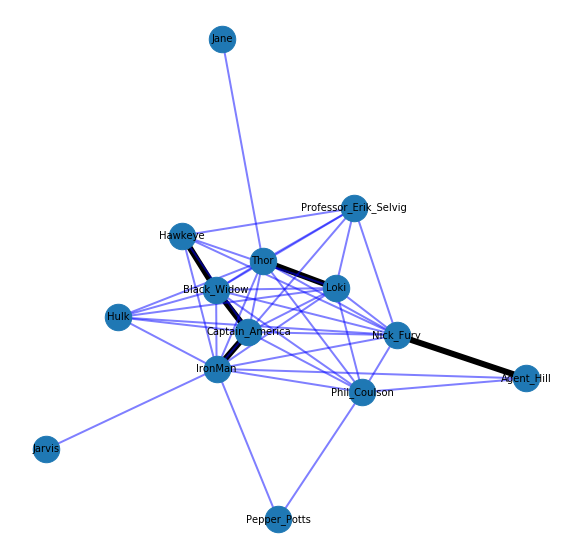

In [9]:
display_graph(a1)

In [10]:
a2 = nx.read_edgelist('Avengers2_edge_list.txt', data=(('weight',float),))

In [11]:
a2 = standardize_names(a2)

In [12]:
print("There are {} nodes and {} edges.".format(len(a2),len(a2.edges)))

There are 11 nodes and 15 edges.


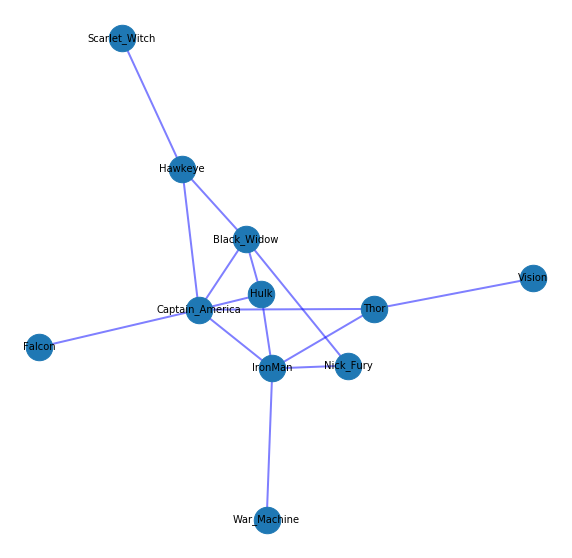

In [13]:
display_graph(a2)

In [14]:
sm1 = nx.read_edgelist("Spider-Man_Homecoming_edge_list.txt", data=(('weight',float),))
tr = nx.read_edgelist("Thor_Ragnarok_edge_list.txt", data=(('weight',float),))

In [15]:
sorted(nx.degree_centrality(a1).items(),key=lambda x:x[1], reverse=True)

[('IronMan', 0.9230769230769231),
 ('Nick_Fury', 0.7692307692307693),
 ('Loki', 0.6923076923076923),
 ('Black_Widow', 0.6923076923076923),
 ('Thor', 0.6923076923076923),
 ('Phil_Coulson', 0.6153846153846154),
 ('Captain_America', 0.6153846153846154),
 ('Professor_Erik_Selvig', 0.46153846153846156),
 ('Hawkeye', 0.46153846153846156),
 ('Hulk', 0.46153846153846156),
 ('Agent_Hill', 0.23076923076923078),
 ('Pepper_Potts', 0.15384615384615385),
 ('Jarvis', 0.07692307692307693),
 ('Jane', 0.07692307692307693)]

In [16]:
sorted(nx.degree_centrality(a2).items(),key=lambda x:x[1], reverse=True)

[('Captain_America', 0.6000000000000001),
 ('IronMan', 0.5),
 ('Black_Widow', 0.4),
 ('Hulk', 0.30000000000000004),
 ('Hawkeye', 0.30000000000000004),
 ('Thor', 0.30000000000000004),
 ('Nick_Fury', 0.2),
 ('Falcon', 0.1),
 ('Scarlet_Witch', 0.1),
 ('War_Machine', 0.1),
 ('Vision', 0.1)]

In [17]:
sorted(nx.betweenness_centrality(a1).items(),key=lambda x:x[1], reverse=True)

[('IronMan', 0.2965811965811966),
 ('Thor', 0.16324786324786325),
 ('Phil_Coulson', 0.06623931623931624),
 ('Nick_Fury', 0.05940170940170939),
 ('Loki', 0.018803418803418803),
 ('Black_Widow', 0.018803418803418803),
 ('Captain_America', 0.011538461538461539),
 ('Professor_Erik_Selvig', 0.004273504273504273),
 ('Hawkeye', 0.0021367521367521365),
 ('Agent_Hill', 0.0),
 ('Hulk', 0.0),
 ('Pepper_Potts', 0.0),
 ('Jarvis', 0.0),
 ('Jane', 0.0)]

In [18]:
sorted(nx.betweenness_centrality(a2).items(),key=lambda x:x[1], reverse=True)

[('Captain_America', 0.4814814814814815),
 ('IronMan', 0.3),
 ('Hawkeye', 0.2),
 ('Thor', 0.2),
 ('Black_Widow', 0.1),
 ('Hulk', 0.014814814814814815),
 ('Nick_Fury', 0.014814814814814815),
 ('Falcon', 0.0),
 ('Scarlet_Witch', 0.0),
 ('War_Machine', 0.0),
 ('Vision', 0.0)]

In [19]:
sorted(nx.closeness_centrality(a1).items(),key=lambda x:x[1], reverse=True)

[('IronMan', 0.9285714285714286),
 ('Nick_Fury', 0.8125),
 ('Loki', 0.7647058823529411),
 ('Black_Widow', 0.7647058823529411),
 ('Thor', 0.7647058823529411),
 ('Phil_Coulson', 0.7222222222222222),
 ('Captain_America', 0.7222222222222222),
 ('Professor_Erik_Selvig', 0.65),
 ('Hulk', 0.65),
 ('Hawkeye', 0.6190476190476191),
 ('Agent_Hill', 0.5416666666666666),
 ('Pepper_Potts', 0.52),
 ('Jarvis', 0.5),
 ('Jane', 0.4482758620689655)]

In [20]:
sorted(nx.closeness_centrality(a2).items(),key=lambda x:x[1], reverse=True)

[('Captain_America', 0.7142857142857143),
 ('IronMan', 0.625),
 ('Black_Widow', 0.5555555555555556),
 ('Thor', 0.5555555555555556),
 ('Hulk', 0.5263157894736842),
 ('Hawkeye', 0.5263157894736842),
 ('Nick_Fury', 0.47619047619047616),
 ('Falcon', 0.43478260869565216),
 ('War_Machine', 0.4),
 ('Vision', 0.37037037037037035),
 ('Scarlet_Witch', 0.35714285714285715)]

In [21]:
sorted(nx.eigenvector_centrality(a1).items(),key=lambda x:x[1], reverse=True)

[('IronMan', 0.3718297969747159),
 ('Nick_Fury', 0.35754433452874096),
 ('Loki', 0.34345769944995236),
 ('Black_Widow', 0.34345769944995236),
 ('Thor', 0.32035697994924955),
 ('Captain_America', 0.3158432605820825),
 ('Phil_Coulson', 0.2829212863553718),
 ('Hulk', 0.2568206126525146),
 ('Professor_Erik_Selvig', 0.24830719319827907),
 ('Hawkeye', 0.24780522060427151),
 ('Agent_Hill', 0.12666513303837482),
 ('Pepper_Potts', 0.0819268895825347),
 ('Jarvis', 0.046525816456869644),
 ('Jane', 0.040085094208470215)]

In [22]:
sorted(nx.eigenvector_centrality(a2).items(),key=lambda x:x[1], reverse=True)

[('Captain_America', 0.5252423399892705),
 ('IronMan', 0.4239776164793333),
 ('Black_Widow', 0.3882630008019449),
 ('Hulk', 0.3715861993408929),
 ('Thor', 0.28577626080887375),
 ('Hawkeye', 0.27502194920307105),
 ('Nick_Fury', 0.22566069411113268),
 ('Falcon', 0.14592550526910208),
 ('War_Machine', 0.11779196536465239),
 ('Vision', 0.07939642586225225),
 ('Scarlet_Witch', 0.07640758071337876)]

In [35]:
combined = combine_weighted_graphs(a1,a2)
c2 = combine_weighted_graphs(combined,sm1)
c3 = combine_weighted_graphs(c2,tr)

In [24]:
print("There are {} nodes and {} edges.".format(len(combined),len(combined.edges)))

There are 18 nodes and 49 edges.


In [25]:
sorted(nx.degree_centrality(combined).items(),key=lambda x:x[1], reverse=True)

[('IronMan', 0.7647058823529411),
 ('Thor', 0.5882352941176471),
 ('Nick_Fury', 0.5882352941176471),
 ('Captain_America', 0.5294117647058824),
 ('Black_Widow', 0.5294117647058824),
 ('Loki', 0.5294117647058824),
 ('Phil_Coulson', 0.47058823529411764),
 ('Hawkeye', 0.4117647058823529),
 ('Hulk', 0.3529411764705882),
 ('Professor_Erik_Selvig', 0.3529411764705882),
 ('Agent_Hill', 0.1764705882352941),
 ('Pepper_Potts', 0.11764705882352941),
 ('Jarvis', 0.058823529411764705),
 ('Jane', 0.058823529411764705),
 ('Falcon', 0.058823529411764705),
 ('Vision', 0.058823529411764705),
 ('Scarlet_Witch', 0.058823529411764705),
 ('War_Machine', 0.058823529411764705)]

In [36]:
sorted(nx.degree_centrality(c3).items(),key=lambda x:x[1], reverse=True)

[('Thor', 0.42105263157894735),
 ('Loki', 0.3684210526315789),
 ('Spider-Man', 0.3684210526315789),
 ('IronMan', 0.3421052631578947),
 ('Captain_America', 0.2631578947368421),
 ('Nick_Fury', 0.2631578947368421),
 ('Black_Widow', 0.23684210526315788),
 ('Phil_Coulson', 0.21052631578947367),
 ('Hulk', 0.18421052631578946),
 ('Hawkeye', 0.18421052631578946),
 ('Professor_Erik_Selvig', 0.15789473684210525),
 ('Ned_Leeds', 0.13157894736842105),
 ('Vulture', 0.13157894736842105),
 ('Shocker2', 0.13157894736842105),
 ('Happy', 0.10526315789473684),
 ('Liz_Allan', 0.10526315789473684),
 ('Pepper_Potts', 0.10526315789473684),
 ('Shocker1', 0.10526315789473684),
 ('Valkyrie', 0.10526315789473684),
 ('Aaron_Davis', 0.07894736842105263),
 ('MJ', 0.07894736842105263),
 ('Iron_Man', 0.07894736842105263),
 ('Agent_Hill', 0.07894736842105263),
 ('Hela', 0.07894736842105263),
 ('Korg', 0.07894736842105263),
 ('Mr.Harrington', 0.05263157894736842),
 ('Flash_Thompson', 0.05263157894736842),
 ('May_Parker

In [26]:
sorted(nx.betweenness_centrality(combined).items(),key=lambda x:x[1], reverse=True)

[('IronMan', 0.3421568627450981),
 ('Thor', 0.23455882352941176),
 ('Captain_America', 0.13210784313725488),
 ('Hawkeye', 0.12009803921568629),
 ('Nick_Fury', 0.051715686274509794),
 ('Phil_Coulson', 0.05024509803921569),
 ('Black_Widow', 0.01985294117647059),
 ('Loki', 0.01985294117647059),
 ('Professor_Erik_Selvig', 0.007352941176470587),
 ('Hulk', 0.0),
 ('Agent_Hill', 0.0),
 ('Jarvis', 0.0),
 ('Jane', 0.0),
 ('Pepper_Potts', 0.0),
 ('Falcon', 0.0),
 ('Vision', 0.0),
 ('Scarlet_Witch', 0.0),
 ('War_Machine', 0.0)]

In [37]:
sorted(nx.betweenness_centrality(c3).items(),key=lambda x:x[1], reverse=True)

[('Spider-Man', 0.5173643568380409),
 ('Captain_America', 0.45631985368827466),
 ('Thor', 0.2514681975208291),
 ('IronMan', 0.16320023030549347),
 ('Loki', 0.11797906929485878),
 ('Hawkeye', 0.05615389825916143),
 ('Pepper_Potts', 0.04759533970060286),
 ('Phil_Coulson', 0.035395922238027504),
 ('Vulture', 0.027501185395922237),
 ('Shocker2', 0.025604551920341397),
 ('Nick_Fury', 0.022337939443202597),
 ('Happy', 0.014996951839057103),
 ('Hulk', 0.01083451872925557),
 ('Iron_Man', 0.007823613086770981),
 ('Black_Widow', 0.0072952651900020345),
 ('Ned_Leeds', 0.005689900426742531),
 ('Liz_Allan', 0.0030820293978188716),
 ('Professor_Erik_Selvig', 0.001828896565738671),
 ('Hela', 0.0011176590123958543),
 ('MJ', 0.0007112375533428165),
 ('Shocker1', 0.000474158368895211),
 ('Valkyrie', 0.000474158368895211),
 ('Aaron_Davis', 0.0),
 ('Mr.Harrington', 0.0),
 ('Agent_Hill', 0.0),
 ('Flash_Thompson', 0.0),
 ('May_Parker', 0.0),
 ('Tinkerer', 0.0),
 ('Scarlet_Witch', 0.0),
 ('Falcon', 0.0),
 ('

In [27]:
sorted(nx.closeness_centrality(combined).items(),key=lambda x:x[1], reverse=True)

[('IronMan', 0.8095238095238095),
 ('Nick_Fury', 0.7083333333333334),
 ('Captain_America', 0.68),
 ('Thor', 0.68),
 ('Black_Widow', 0.68),
 ('Loki', 0.68),
 ('Phil_Coulson', 0.6296296296296297),
 ('Hulk', 0.5862068965517241),
 ('Hawkeye', 0.5862068965517241),
 ('Professor_Erik_Selvig', 0.5862068965517241),
 ('Agent_Hill', 0.4857142857142857),
 ('Pepper_Potts', 0.4722222222222222),
 ('Jarvis', 0.4594594594594595),
 ('War_Machine', 0.4594594594594595),
 ('Jane', 0.4146341463414634),
 ('Falcon', 0.4146341463414634),
 ('Vision', 0.4146341463414634),
 ('Scarlet_Witch', 0.37777777777777777)]

In [38]:
sorted(nx.closeness_centrality(c3).items(),key=lambda x:x[1], reverse=True)

[('Captain_America', 0.5671641791044776),
 ('Spider-Man', 0.5066666666666667),
 ('Thor', 0.5),
 ('IronMan', 0.5),
 ('Loki', 0.4935064935064935),
 ('Nick_Fury', 0.4691358024691358),
 ('Phil_Coulson', 0.4634146341463415),
 ('Black_Widow', 0.4634146341463415),
 ('Hulk', 0.4470588235294118),
 ('Hawkeye', 0.4367816091954023),
 ('Pepper_Potts', 0.40425531914893614),
 ('Professor_Erik_Selvig', 0.3838383838383838),
 ('Happy', 0.37254901960784315),
 ('Iron_Man', 0.36893203883495146),
 ('Falcon', 0.36538461538461536),
 ('Ned_Leeds', 0.35514018691588783),
 ('Vulture', 0.35514018691588783),
 ('Shocker2', 0.35514018691588783),
 ('Liz_Allan', 0.35185185185185186),
 ('Shocker1', 0.35185185185185186),
 ('Valkyrie', 0.35185185185185186),
 ('Aaron_Davis', 0.3486238532110092),
 ('Hela', 0.3486238532110092),
 ('Korg', 0.3486238532110092),
 ('MJ', 0.34545454545454546),
 ('Odin', 0.34545454545454546),
 ('Dr_Strange', 0.34545454545454546),
 ('Mr.Harrington', 0.34234234234234234),
 ('Agent_Hill', 0.3423423423

In [28]:
sorted(nx.eigenvector_centrality(combined).items(),key=lambda x:x[1], reverse=True)

[('IronMan', 0.3736217041610093),
 ('Nick_Fury', 0.35435251456892514),
 ('Black_Widow', 0.340486120991199),
 ('Loki', 0.340486120991199),
 ('Thor', 0.32178225116822046),
 ('Captain_America', 0.3176283343083334),
 ('Phil_Coulson', 0.28039982543597486),
 ('Hulk', 0.25469721255374134),
 ('Hawkeye', 0.24914892689303847),
 ('Professor_Erik_Selvig', 0.24618227347175034),
 ('Agent_Hill', 0.1253837064352134),
 ('Pepper_Potts', 0.08132272828543452),
 ('Jarvis', 0.04645706516907706),
 ('War_Machine', 0.04645706516907706),
 ('Jane', 0.040011094099403656),
 ('Vision', 0.040011094099403656),
 ('Falcon', 0.039494577755948744),
 ('Scarlet_Witch', 0.03097963867395772)]

In [39]:
sorted(nx.eigenvector_centrality(c3).items(),key=lambda x:x[1], reverse=True)

[('Loki', 0.36811090213218484),
 ('Thor', 0.35879246762574385),
 ('IronMan', 0.34419736912871024),
 ('Nick_Fury', 0.327563087139484),
 ('Black_Widow', 0.3158905273035202),
 ('Captain_America', 0.30072050404400125),
 ('Phil_Coulson', 0.260488884781672),
 ('Hulk', 0.2536178766657501),
 ('Professor_Erik_Selvig', 0.22967260444789087),
 ('Hawkeye', 0.22636227133596903),
 ('Valkyrie', 0.12799775821917553),
 ('Agent_Hill', 0.11031498993095795),
 ('Korg', 0.10116214986512918),
 ('Hela', 0.09233278615554454),
 ('Odin', 0.08601592913446908),
 ('Dr_Strange', 0.08601592913446908),
 ('Pepper_Potts', 0.07574752542303316),
 ('Scourge', 0.05338254323366022),
 ('Spider-Man', 0.05071484594394883),
 ('Jane', 0.04245662827273888),
 ('Vision', 0.04245662827273888),
 ('War_Machine', 0.0407295865856323),
 ('Jarvis', 0.0407295865856323),
 ('Falcon', 0.03558496384145255),
 ('Scarlet_Witch', 0.026785912354253403),
 ('Happy', 0.018305880662961307),
 ('Iron_Man', 0.01713153167085032),
 ('Ned_Leeds', 0.01109669625

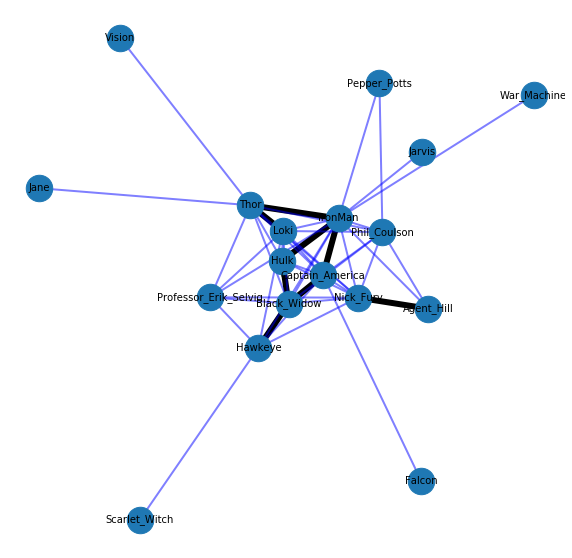

In [29]:
display_graph(combined)

In [30]:
#Similarity between two nodes using the Hub Promoted Index
def hpi(G,x,y):
    return len(list(nx.common_neighbors(G, x, y)))/min(G.degree(x),G.degree(y))

In [31]:
combined.nodes

NodeView(('Hulk', 'IronMan', 'Captain_America', 'Thor', 'Black_Widow', 'Nick_Fury', 'Hawkeye', 'Phil_Coulson', 'Agent_Hill', 'Loki', 'Professor_Erik_Selvig', 'Jarvis', 'Jane', 'Pepper_Potts', 'Falcon', 'Vision', 'Scarlet_Witch', 'War_Machine'))

In [42]:
c3.nodes

NodeView(('Loki', 'Thor', 'Hulk', 'IronMan', 'Aaron_Davis', 'Spider-Man', 'Captain_America', 'Phil_Coulson', 'MJ', 'Mr.Harrington', 'Happy', 'Iron_Man', 'Nick_Fury', 'Black_Widow', 'Hawkeye', 'Agent_Hill', 'Flash_Thompson', 'Liz_Allan', 'May_Parker', 'Ned_Leeds', 'Professor_Erik_Selvig', 'Vulture', 'Pepper_Potts', 'Shocker1', 'Shocker2', 'Tinkerer', 'Scarlet_Witch', 'Falcon', 'War_Machine', 'Jarvis', 'Jane', 'Mr.Delmar', 'Vision', 'Hela', 'Valkyrie', 'Odin', 'Korg', 'Scourge', 'Dr_Strange'))

In [32]:
hpi(combined, 'Captain_America', 'Nick_Fury')

0.7777777777777778

In [33]:
hpi(a1,'Captain_America', 'Nick_Fury')

0.875

In [34]:
hpi(a2,'Captain_America', 'Nick_Fury')

1.0

In [41]:
hpi(c3,'Captain_America', 'Nick_Fury')

0.7

In [43]:
hpi(c3,'Spider-Man','Iron_Man')

0.3333333333333333

In [44]:
#returns Sorenson Index for given nodes x and y
def sorenson_index (g, x, y) :
    cn = len(list(nx.common_neighbors(g, x, y)))
    return 2*cn/(g.degree(x)+g.degree(y))

In [45]:
sorenson_index(combined, 'Captain_America', 'Nick_Fury')

0.7368421052631579

In [46]:
sorenson_index(a1, 'Captain_America', 'Nick_Fury')

0.7777777777777778

In [47]:
sorenson_index(a2, 'Captain_America', 'Nick_Fury')

0.5

In [48]:
sorenson_index(c3, 'Captain_America', 'Nick_Fury')

0.7

In [49]:
#returns Common Neighbr Distance for given nodes x and y 
def common_neighbor_distance (g, x, y) :
    cn = len(list(nx.common_neighbors(g, x, y)))
    if(cn > 0):
        return (1 + cn)/2
    else:
        return 1/nx.shortest_path_length(g, source = x, target = y)

In [50]:
common_neighbor_distance(combined, 'Captain_America', 'Nick_Fury')

4.0

In [51]:
common_neighbor_distance(a1, 'Captain_America', 'Nick_Fury')

4.0

In [52]:
common_neighbor_distance(a2, 'Captain_America', 'Nick_Fury')

1.5

In [53]:
common_neighbor_distance(c3, 'Captain_America', 'Nick_Fury')

4.0

In [54]:
def cnc(g, x, y, a):
    intersect = len(list(nx.common_neighbors(g, x, y)))
    return a*intersect + (1-a)*g.number_of_nodes()/nx.shortest_path_length(g, source = x, target = y)

In [56]:
cnc(combined, 'Captain_America', 'Nick_Fury',0.5)

12.5

In [57]:
cnc(a1, 'Captain_America', 'Nick_Fury',0.5)

10.5

In [58]:
cnc(a2, 'Captain_America', 'Nick_Fury',0.5)

3.75

In [59]:
cnc(c3, 'Captain_America', 'Nick_Fury',0.5)

23.0